In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, RationalQuadratic
import itertools as it
import time
from itertools import combinations

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import torch

## Load the Data

In [5]:
# File paths
input_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_7/initial_inputs.npy"
output_file_path = "/Users/macponcho/a_IMPERIAL_COLLEGE/CAPSTONE Project - Black Box optimization/initial_data/function_7/initial_outputs.npy"

# Load the data
inputs = np.load(input_file_path)
outputs = np.load(output_file_path)

# Convert to pandas DataFrame for easier manipulation and analysis
df = pd.DataFrame(inputs, columns=[f'Input_{i+1}' for i in range(inputs.shape[1])])
df['Output'] = outputs

df

,Input_1,Input_2,Input_3,Input_4,Input_5,Input_6,Output
0,0.272624,0.324495,0.897109,0.832951,0.154063,0.795864,0.604433
1,0.543003,0.924694,0.341567,0.646486,0.718440,0.343133,0.562753
2,0.090832,0.661529,0.065931,0.258577,0.963453,0.640265,0.007503
3,0.118867,0.615055,0.905816,0.855300,0.413631,0.585236,0.061424
4,0.630218,0.838097,0.680013,0.731895,0.526737,0.348429,0.273047
5,0.764919,0.255883,0.609084,0.218079,0.322943,0.095794,0.083747
6,0.057896,0.491672,0.247422,0.218118,0.420428,0.730970,1.364968
7,0.195252,0.079227,0.554580,0.170567,0.014944,0.107032,0.092645
8,0.642303,0.836875,0.021793,0.101488,0.683071,0.692416,0.017870
9,0.789943,0.195545,0.575623,0.073659,0.259049,0.051100,0.033565


In [6]:
#Adicion de datos conforme el concurso ha avanzado

#Datos pre-competencia que aparecieron
new_data_0=pd.DataFrame([{'Input_1':0.111111,'Input_2':0.111111,'Input_3':0.111111,'Input_4':0.111111,'Input_5':0.111111,'Input_6':0.111111,'Output':0.08866875}]) 
df=pd.concat([df,new_data_0],ignore_index=True)

# 5 may
new_data=[0.05,0.55,0.15,0.25,0.45,0.75,0.943570620362295]
df.loc[len(df)] = new_data

new_data=[0.25,0.25,0.45,0.25,0.35,0.75,2.88587654038395]
df.loc[len(df)] = new_data

# 14 may
df.loc[len(df)]=[0.25,0.166667,0.333334,0.25,0.25,0.916666,1.76820368675416]
df.loc[len(df)]=[1.00000e-06,9.99999e-01,9.99999e-01,1.00000e-06,9.99999e-01,1.00000e-06,0.00614332749291892]
df.loc[len(df)]=[0.25,0.333334,0.333334,0.333334,0.333334,0.75,2.54652630892653]

# 17 may
df.loc[len(df)]=[0.166667,0.166667,0.5,0.416667,0.416667,0.75,2.1810638752945573]

# 20 may
df.loc[len(df)]=[0.3,0.2,0.4,0.25,0.35,0.65,3.04345639514518]
df.loc[len(df)]=[0.35,0.35,0.55,0.3,0.35,0.8,2.2456574932562]

# 2 JUN
df.loc[len(df)]=[0.275,0.275,0.4625,0.2375,0.275,0.6125,2.93355747455889]

# 13 jun
df.loc[len(df)]=[0.245833,0.245833,0.429167,0.245833,0.383333,0.6125,2.865715993]
df.loc[len(df)]=[0.666667,0.5,0.333333,0.333333,0.999999,0.75,0.009849774]

# 17 jun
df.loc[len(df)]=[0.319231,0.265385,0.373077,0.157692,0.319231,0.642308,2.56188257018027]
df.loc[len(df)]=[0.319231,0.211538,0.426923,0.265385,0.319231,0.696154,3.07231839008328]


#Print
df_orig=df
df

,Input_1,Input_2,Input_3,Input_4,Input_5,Input_6,Output
0,0.272624,0.324495,0.897109,0.832951,0.154063,0.795864,0.604433
1,0.543003,0.924694,0.341567,0.646486,0.718440,0.343133,0.562753
2,0.090832,0.661529,0.065931,0.258577,0.963453,0.640265,0.007503
3,0.118867,0.615055,0.905816,0.855300,0.413631,0.585236,0.061424
4,0.630218,0.838097,0.680013,0.731895,0.526737,0.348429,0.273047
5,0.764919,0.255883,0.609084,0.218079,0.322943,0.095794,0.083747
6,0.057896,0.491672,0.247422,0.218118,0.420428,0.730970,1.364968
7,0.195252,0.079227,0.554580,0.170567,0.014944,0.107032,0.092645
8,0.642303,0.836875,0.021793,0.101488,0.683071,0.692416,0.017870
9,0.789943,0.195545,0.575623,0.073659,0.259049,0.051100,0.033565


# Function 7

### You are now optimising six hyper-parameters of a machine learning model. Note that it is a popular and frequently used model, so maybe you could search to see if anyone else has optisized it before?

## Data exploration

In [7]:
# Display basic statistics
print("Basic Statistical Summary:")
print(df.describe())

# Check for any missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

Basic Statistical Summary:
         Input_1    Input_2    Input_3    Input_4    Input_5    Input_6  \
count  42.000000  42.000000  42.000000  42.000000  42.000000  42.000000   
mean    0.434305   0.381493   0.398596   0.437199   0.459178   0.523664   
std     0.296698   0.248405   0.288910   0.294208   0.301120   0.275525   
min     0.000001   0.011813   0.003635   0.000001   0.014944   0.000001   
25%     0.180796   0.196659   0.137050   0.230968   0.252262   0.344457   
50%     0.334905   0.337722   0.350832   0.324700   0.398482   0.626393   
75%     0.713675   0.526058   0.570363   0.710543   0.711722   0.745242   
max     0.942451   0.999999   0.999999   0.961017   0.999999   0.951014   

          Output  
count  42.000000  
mean    0.669202  
std     0.988902  
min     0.002701  
25%     0.018992  
50%     0.097959  
75%     0.659238  
max     3.043456  

Missing values in the dataset:
Input_1    0
Input_2    0
Input_3    0
Input_4    0
Input_5    0
Input_6    0
Output     0
dty

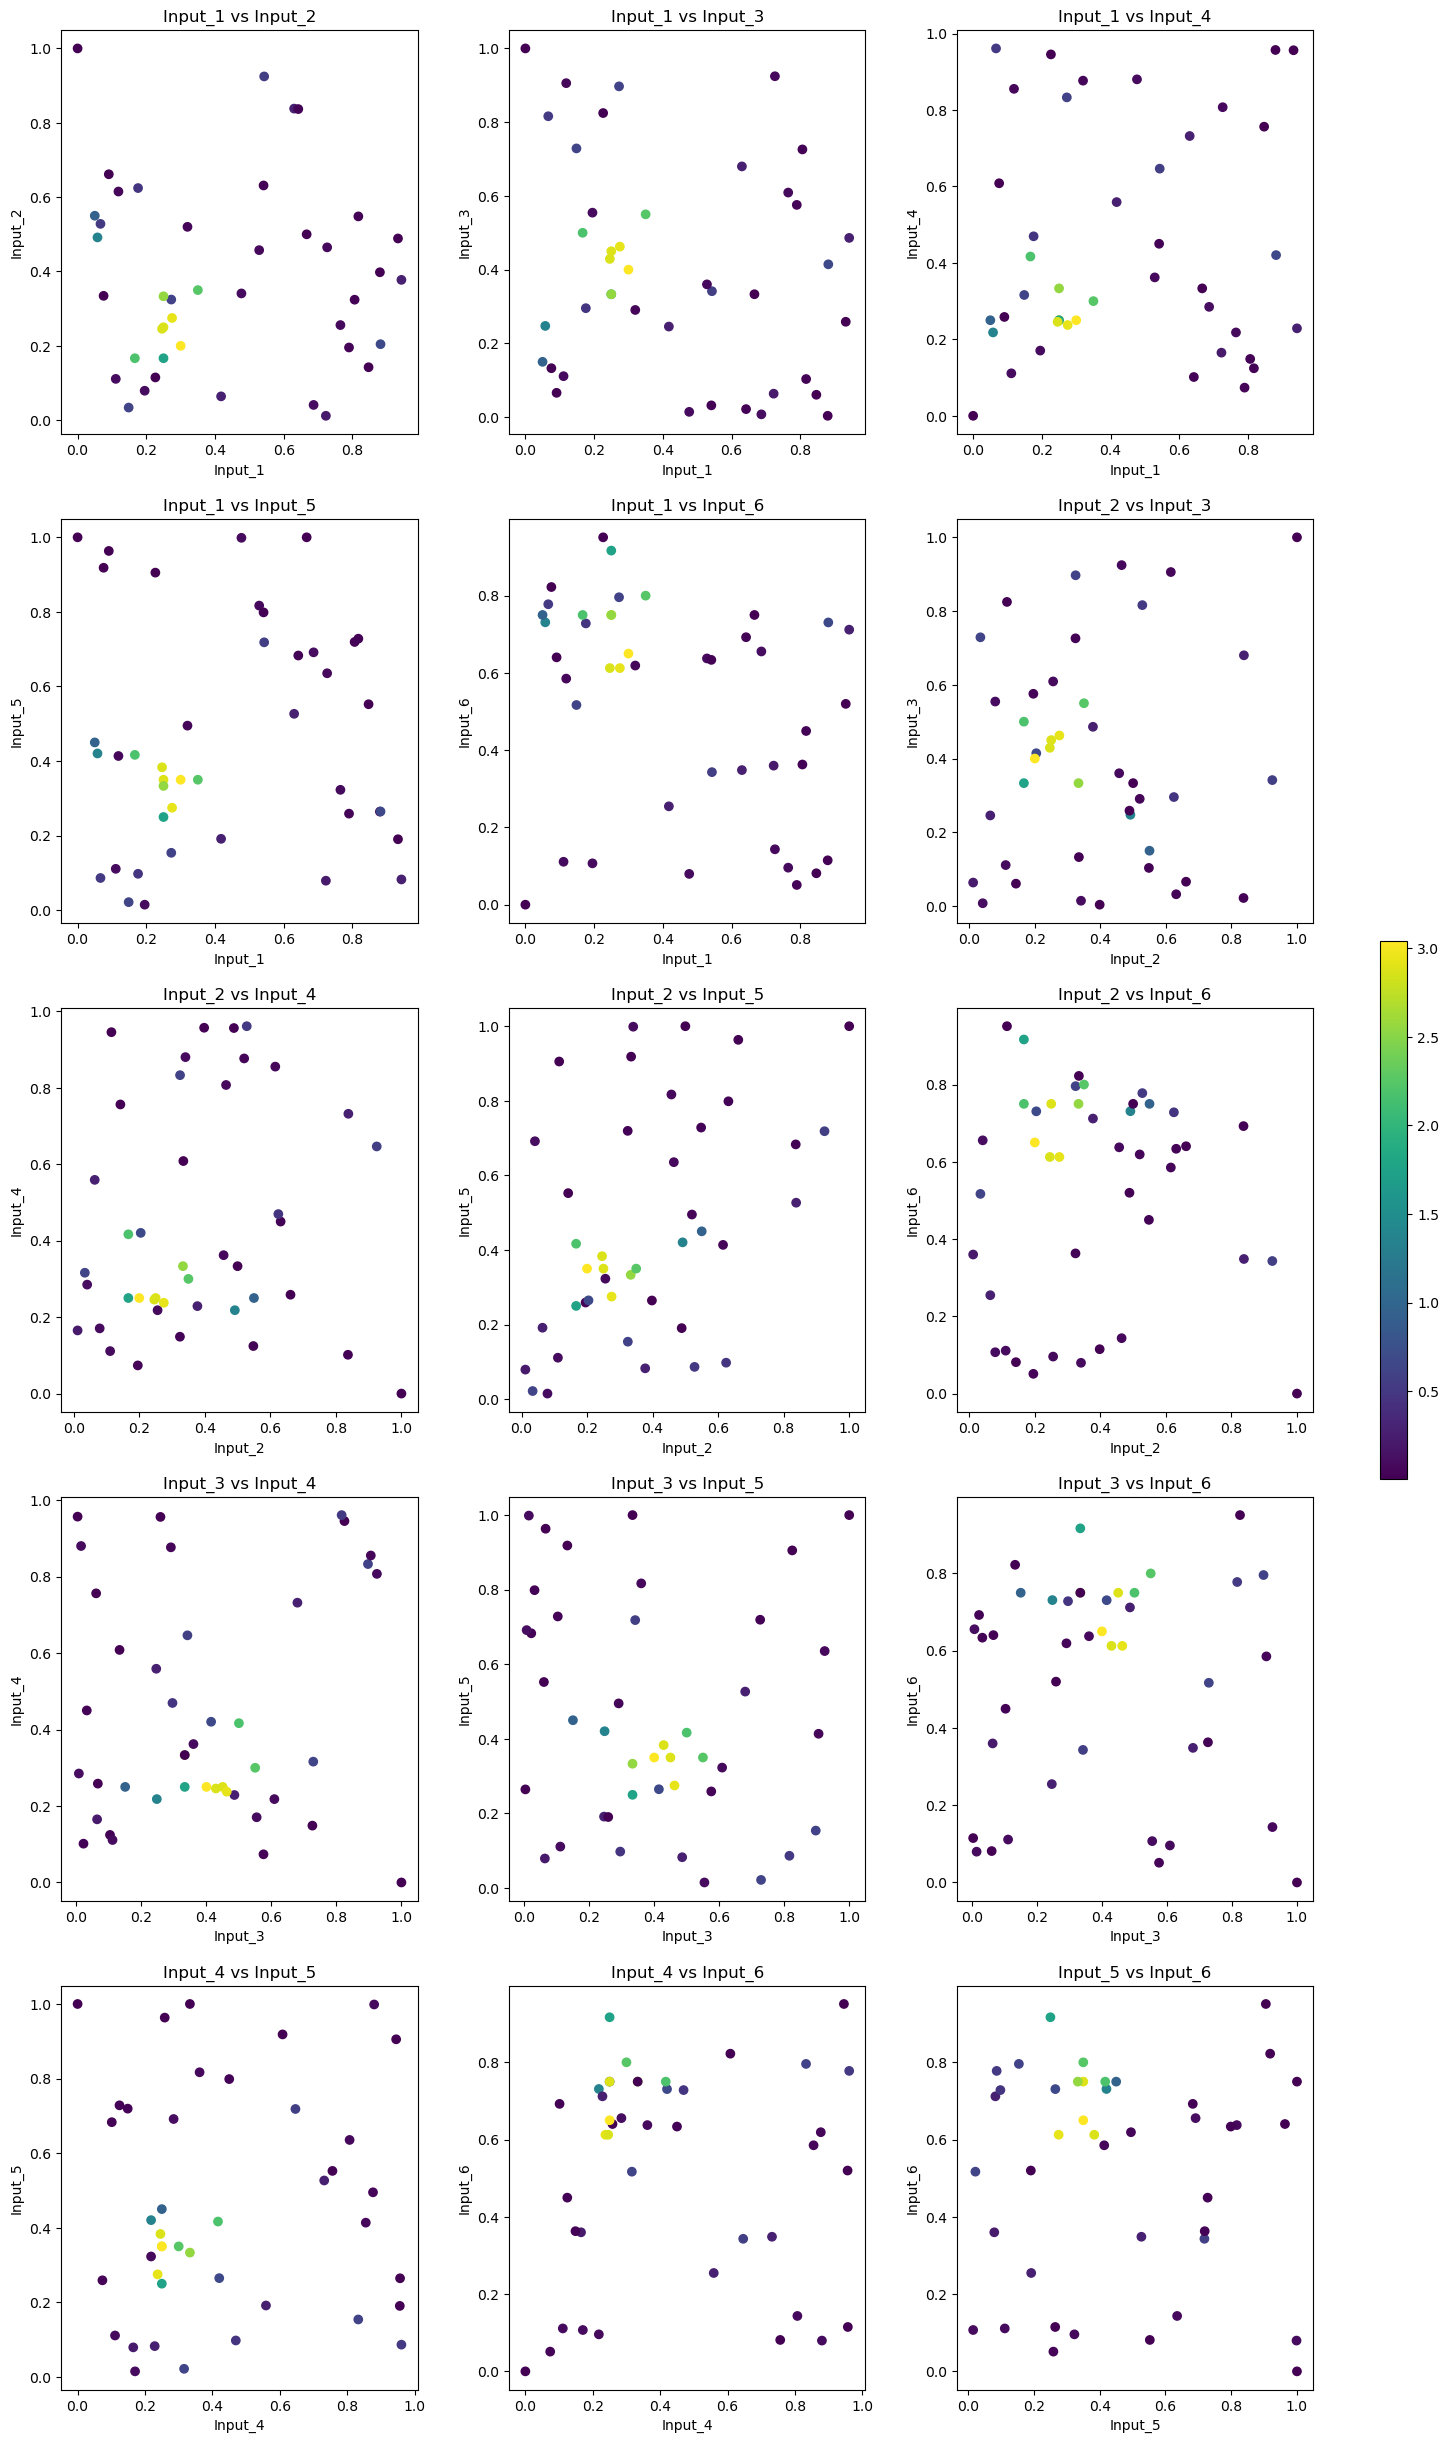

In [8]:
from itertools import combinations

# Calculate all pair combinations of input columns
input_columns = df.columns[df.columns.str.startswith('Input')]  # Select only columns that start with 'Input'
pair_combinations = list(combinations(input_columns, 2))  # Get all combinations of Input columns taken 2 at a time

# Determine the grid size for subplots
num_plots = len(pair_combinations)
num_cols = 3  # Set number of columns in the subplot grid
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate rows needed, round up

# Create a figure with subplots in a grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))  # Adjust figure size as needed
fig.tight_layout(pad=4.0)  # Add spacing between plots

# Flatten axes array for easier iteration if it's 2D
axes = axes.flatten()

# Plotting each combination in the grid
for i, (x_col, y_col) in enumerate(pair_combinations):
    ax = axes[i]
    scatter = ax.scatter(df[x_col], df[y_col], c=df['Output'], cmap='viridis')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f'{x_col} vs {y_col}')

# Add a colorbar to the last plot
fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=.02)

# Turn off axes for any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

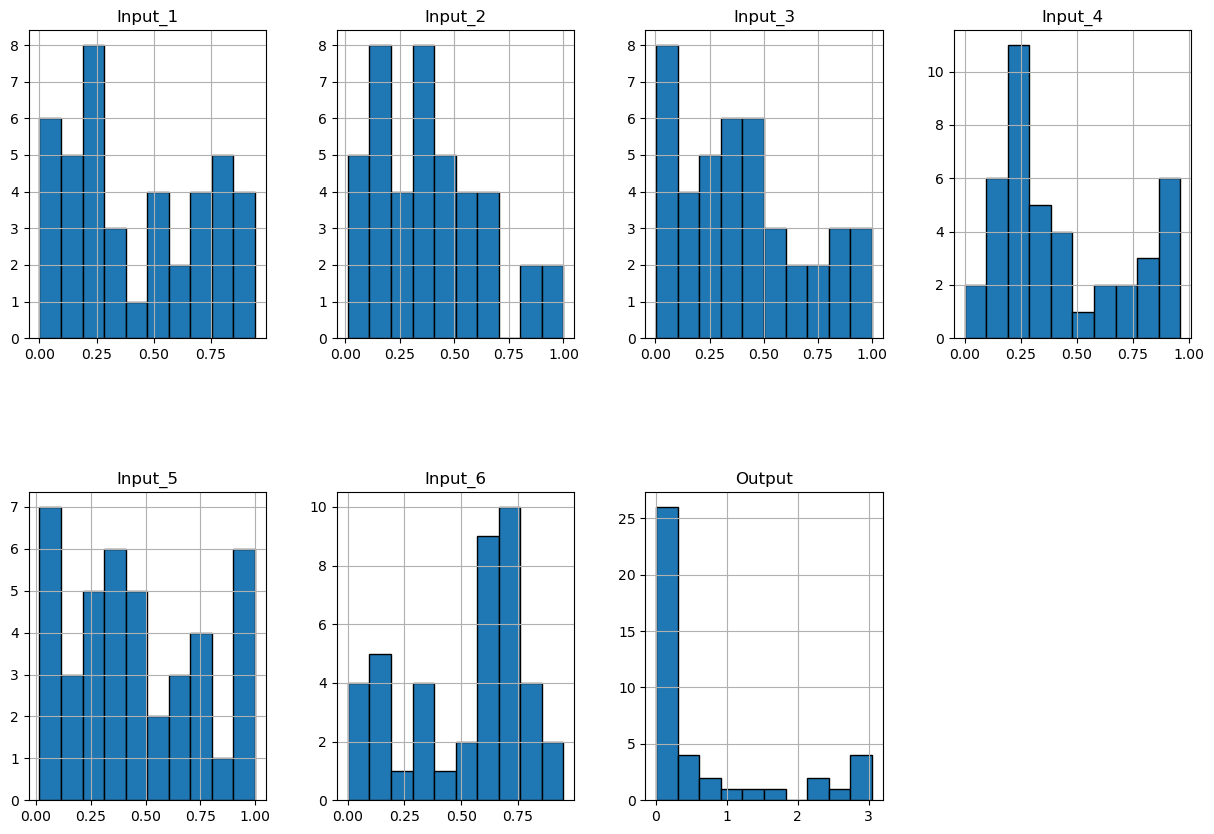

In [9]:
# Plot histograms for each column to understand distributions
df.hist(bins=10, figsize=(15, 10), layout=(-1, 4), edgecolor='black')
plt.subplots_adjust(hspace=0.5)
plt.show()

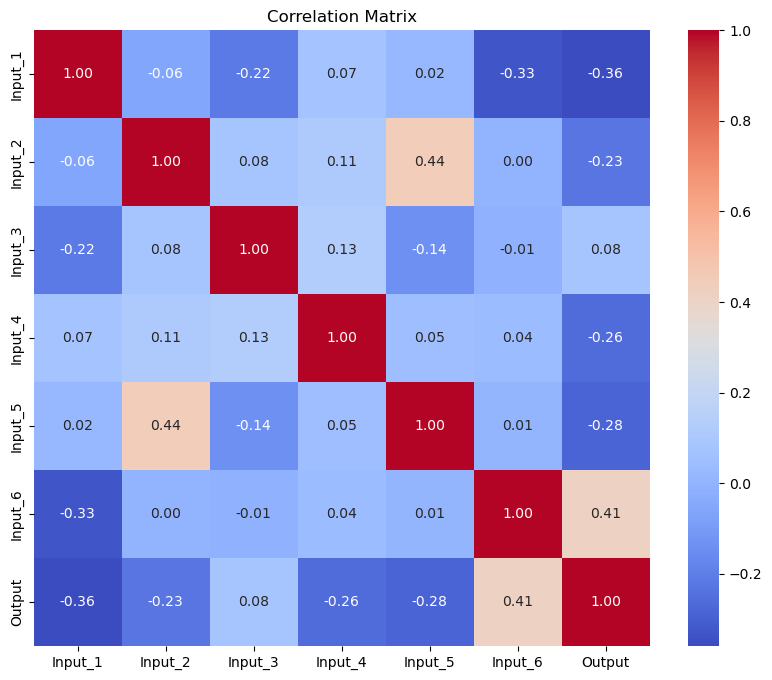

In [10]:
# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

/Users/macponcho/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


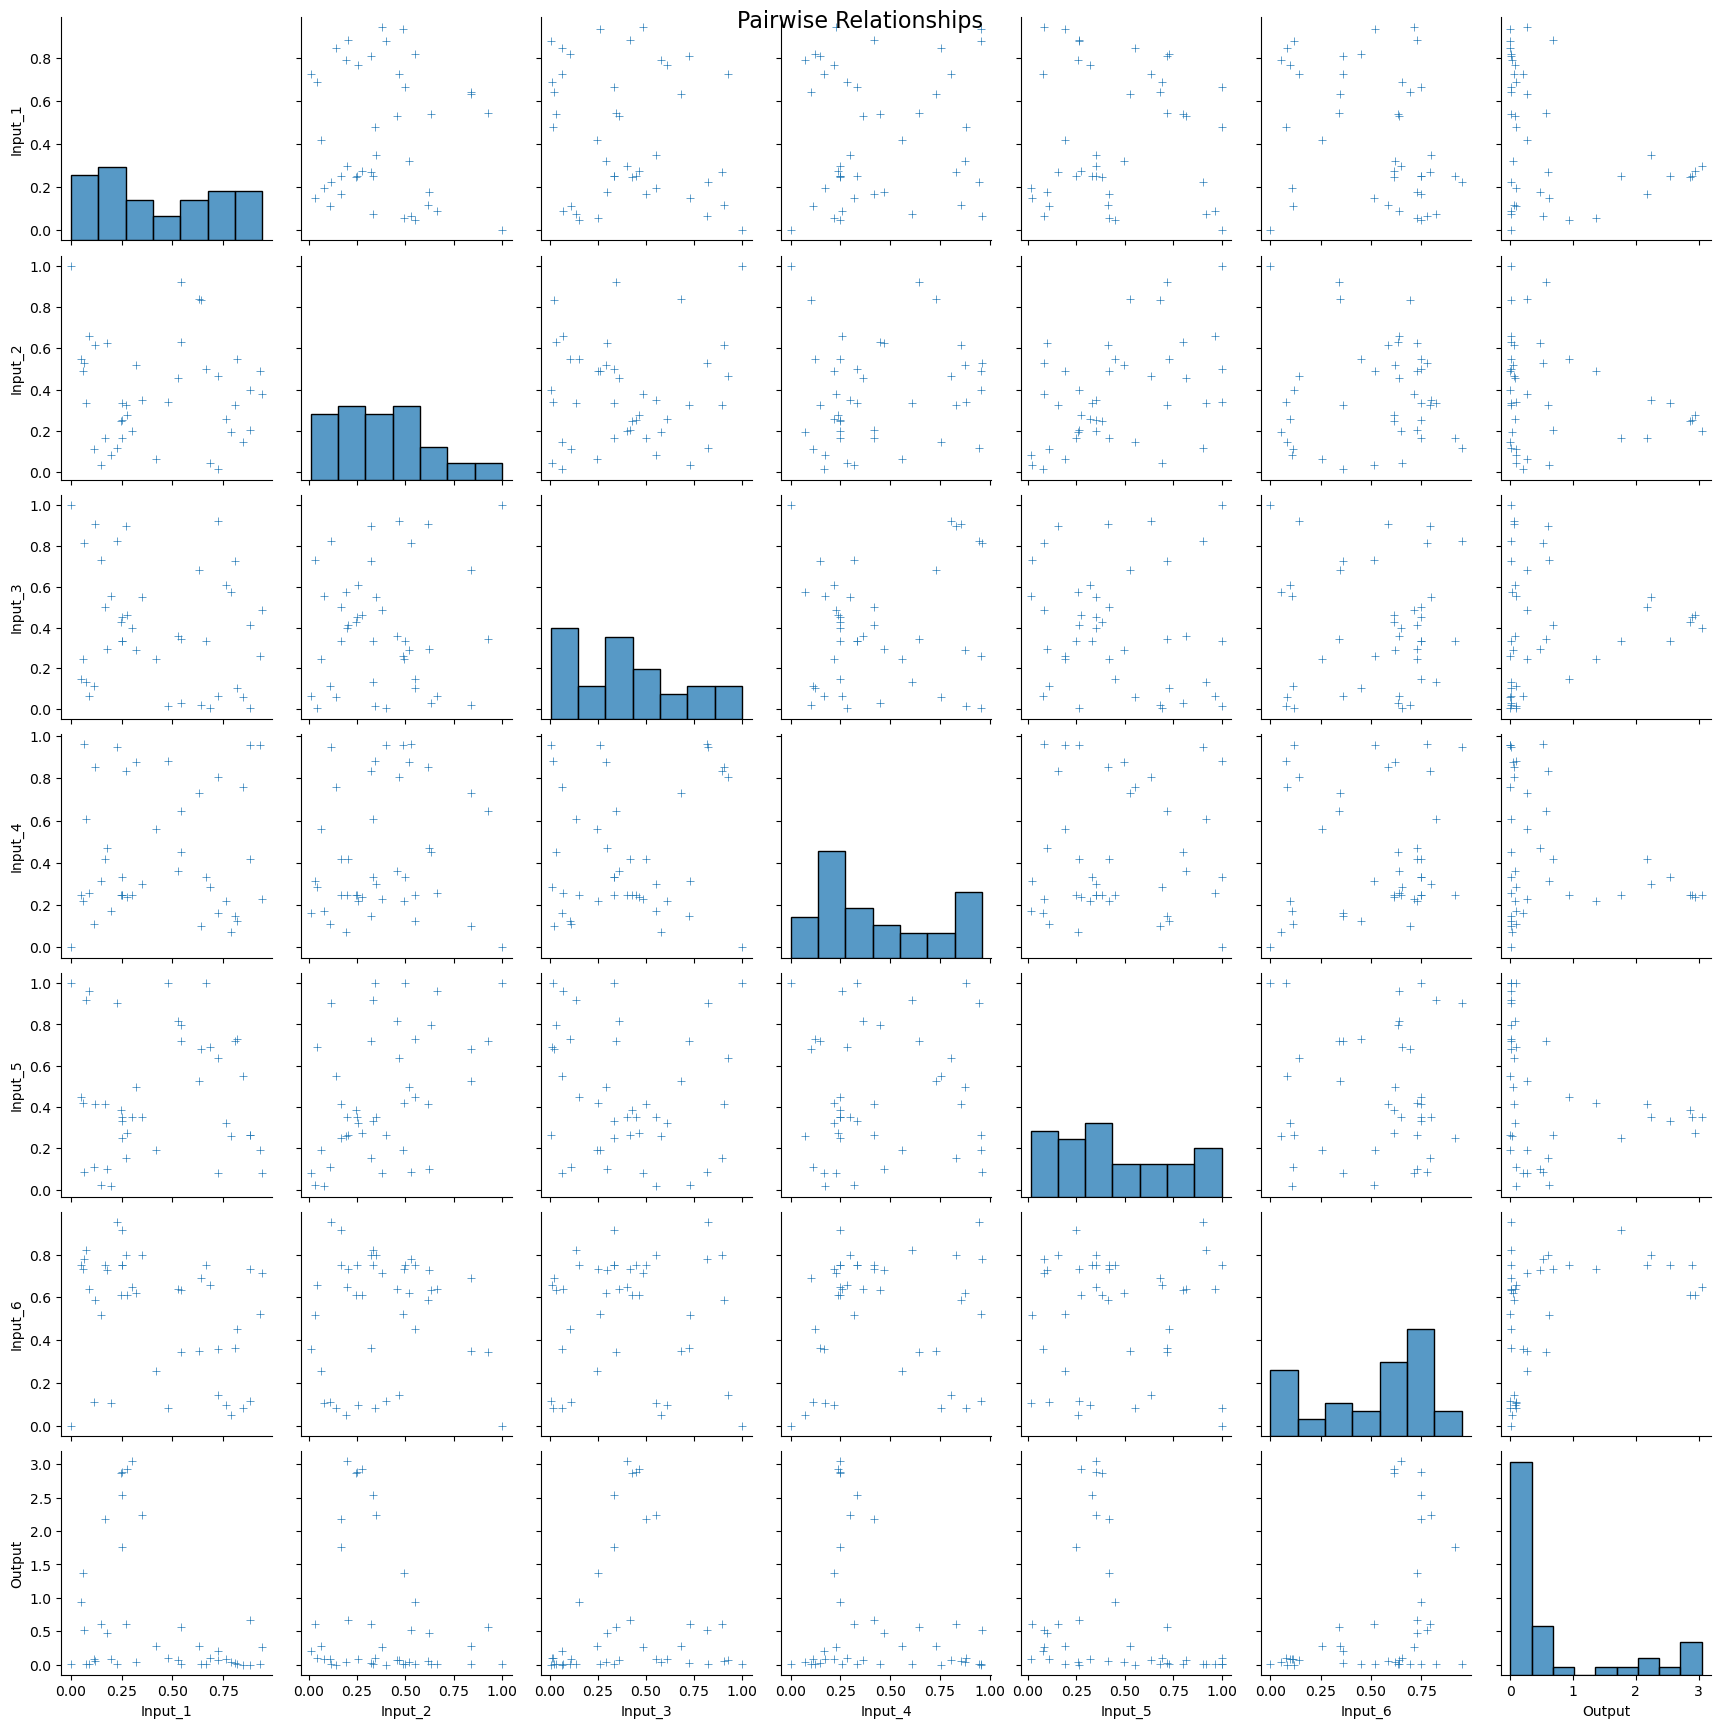

In [11]:
# Use pairplot to visualize the relationships between variables
sns.pairplot(df, kind='scatter', diag_kind='hist', markers='+')
plt.suptitle('Pairwise Relationships', verticalalignment='baseline', fontsize=16)
plt.show()

## FOR THIS CASE ONLY


# 


## Definir las variables

In [51]:
X = df.drop(columns=['Output'])
y = df[['Output']] 

In [52]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, WhiteKernel, RationalQuadratic
import itertools as it

START_TIME=time.time()

# Parameters of the model
#****************************************
noise_assumption = 1e-10 # noise assumption, a hyper-parameter (default 1e-10)

rbf_lengthscale = .3 # lengthscale parameter (default = 1), comenzaremos con 0.2 y luego ir descendiendo a 0.1 o menos
   #ARD. Automatic relevance determination
    
# define kernel of GP
kernel = RBF(length_scale=rbf_lengthscale, length_scale_bounds='fixed')

# Define a kernel with both smooth and rough components, and noise handling
#kernel = Matern(length_scale=1, nu=1.5) + WhiteKernel(noise_level=0.1) + RationalQuadratic(length_scale=1.0, alpha=0.1)
#kernel=kernel + WhiteKernel(noise_level=1e-5) #ESPECIAL PARA FUNCION 1 POR LAS ANOMALIAS
#kernel = Matern(length_scale=0.1, nu=1.5, length_scale_bounds=(0.01, 1), ARD=True)

#Grid:
GG=14    #Numero de datos para cada variable en el Grid.  
dim=6    #Numero de Inputs
#******************************************************

x1 = np.linspace(0.05,0.75, GG)     #Genera la primer variable. RANGO DE EXPLORACION
X_grid = np.fromiter(it.chain(*it.product(x1, repeat=dim)), dtype=float).reshape(-1,dim) #Genera todas las variables
# Convert X_grid into a DataFrame with meaningful names
X_grid_df = pd.DataFrame(X_grid, columns=X.columns)

# Fit the Gaussian process - Surrogate model
GPR_model = GaussianProcessRegressor(kernel = kernel, alpha=noise_assumption)
GPR_model.fit(X, y)

#Genera la funcion del Surrogate model para cada punto del grid
mean, std = GPR_model.predict(X_grid_df, return_std = True)

END_TIME=time.time()
ELAPSED_TIME=END_TIME-START_TIME
print("Time: ", ELAPSED_TIME)

Time:  71.95530486106873


In [53]:
#Acquisition function
#######################################################

beta = 1.96
acquisition_function = mean + beta * std

#######################################################

idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado

# Formatting the single row
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print(f"[{formatted_row}]")

[0.373077-0.265385-0.373077-0.103846-0.319231-0.642308]


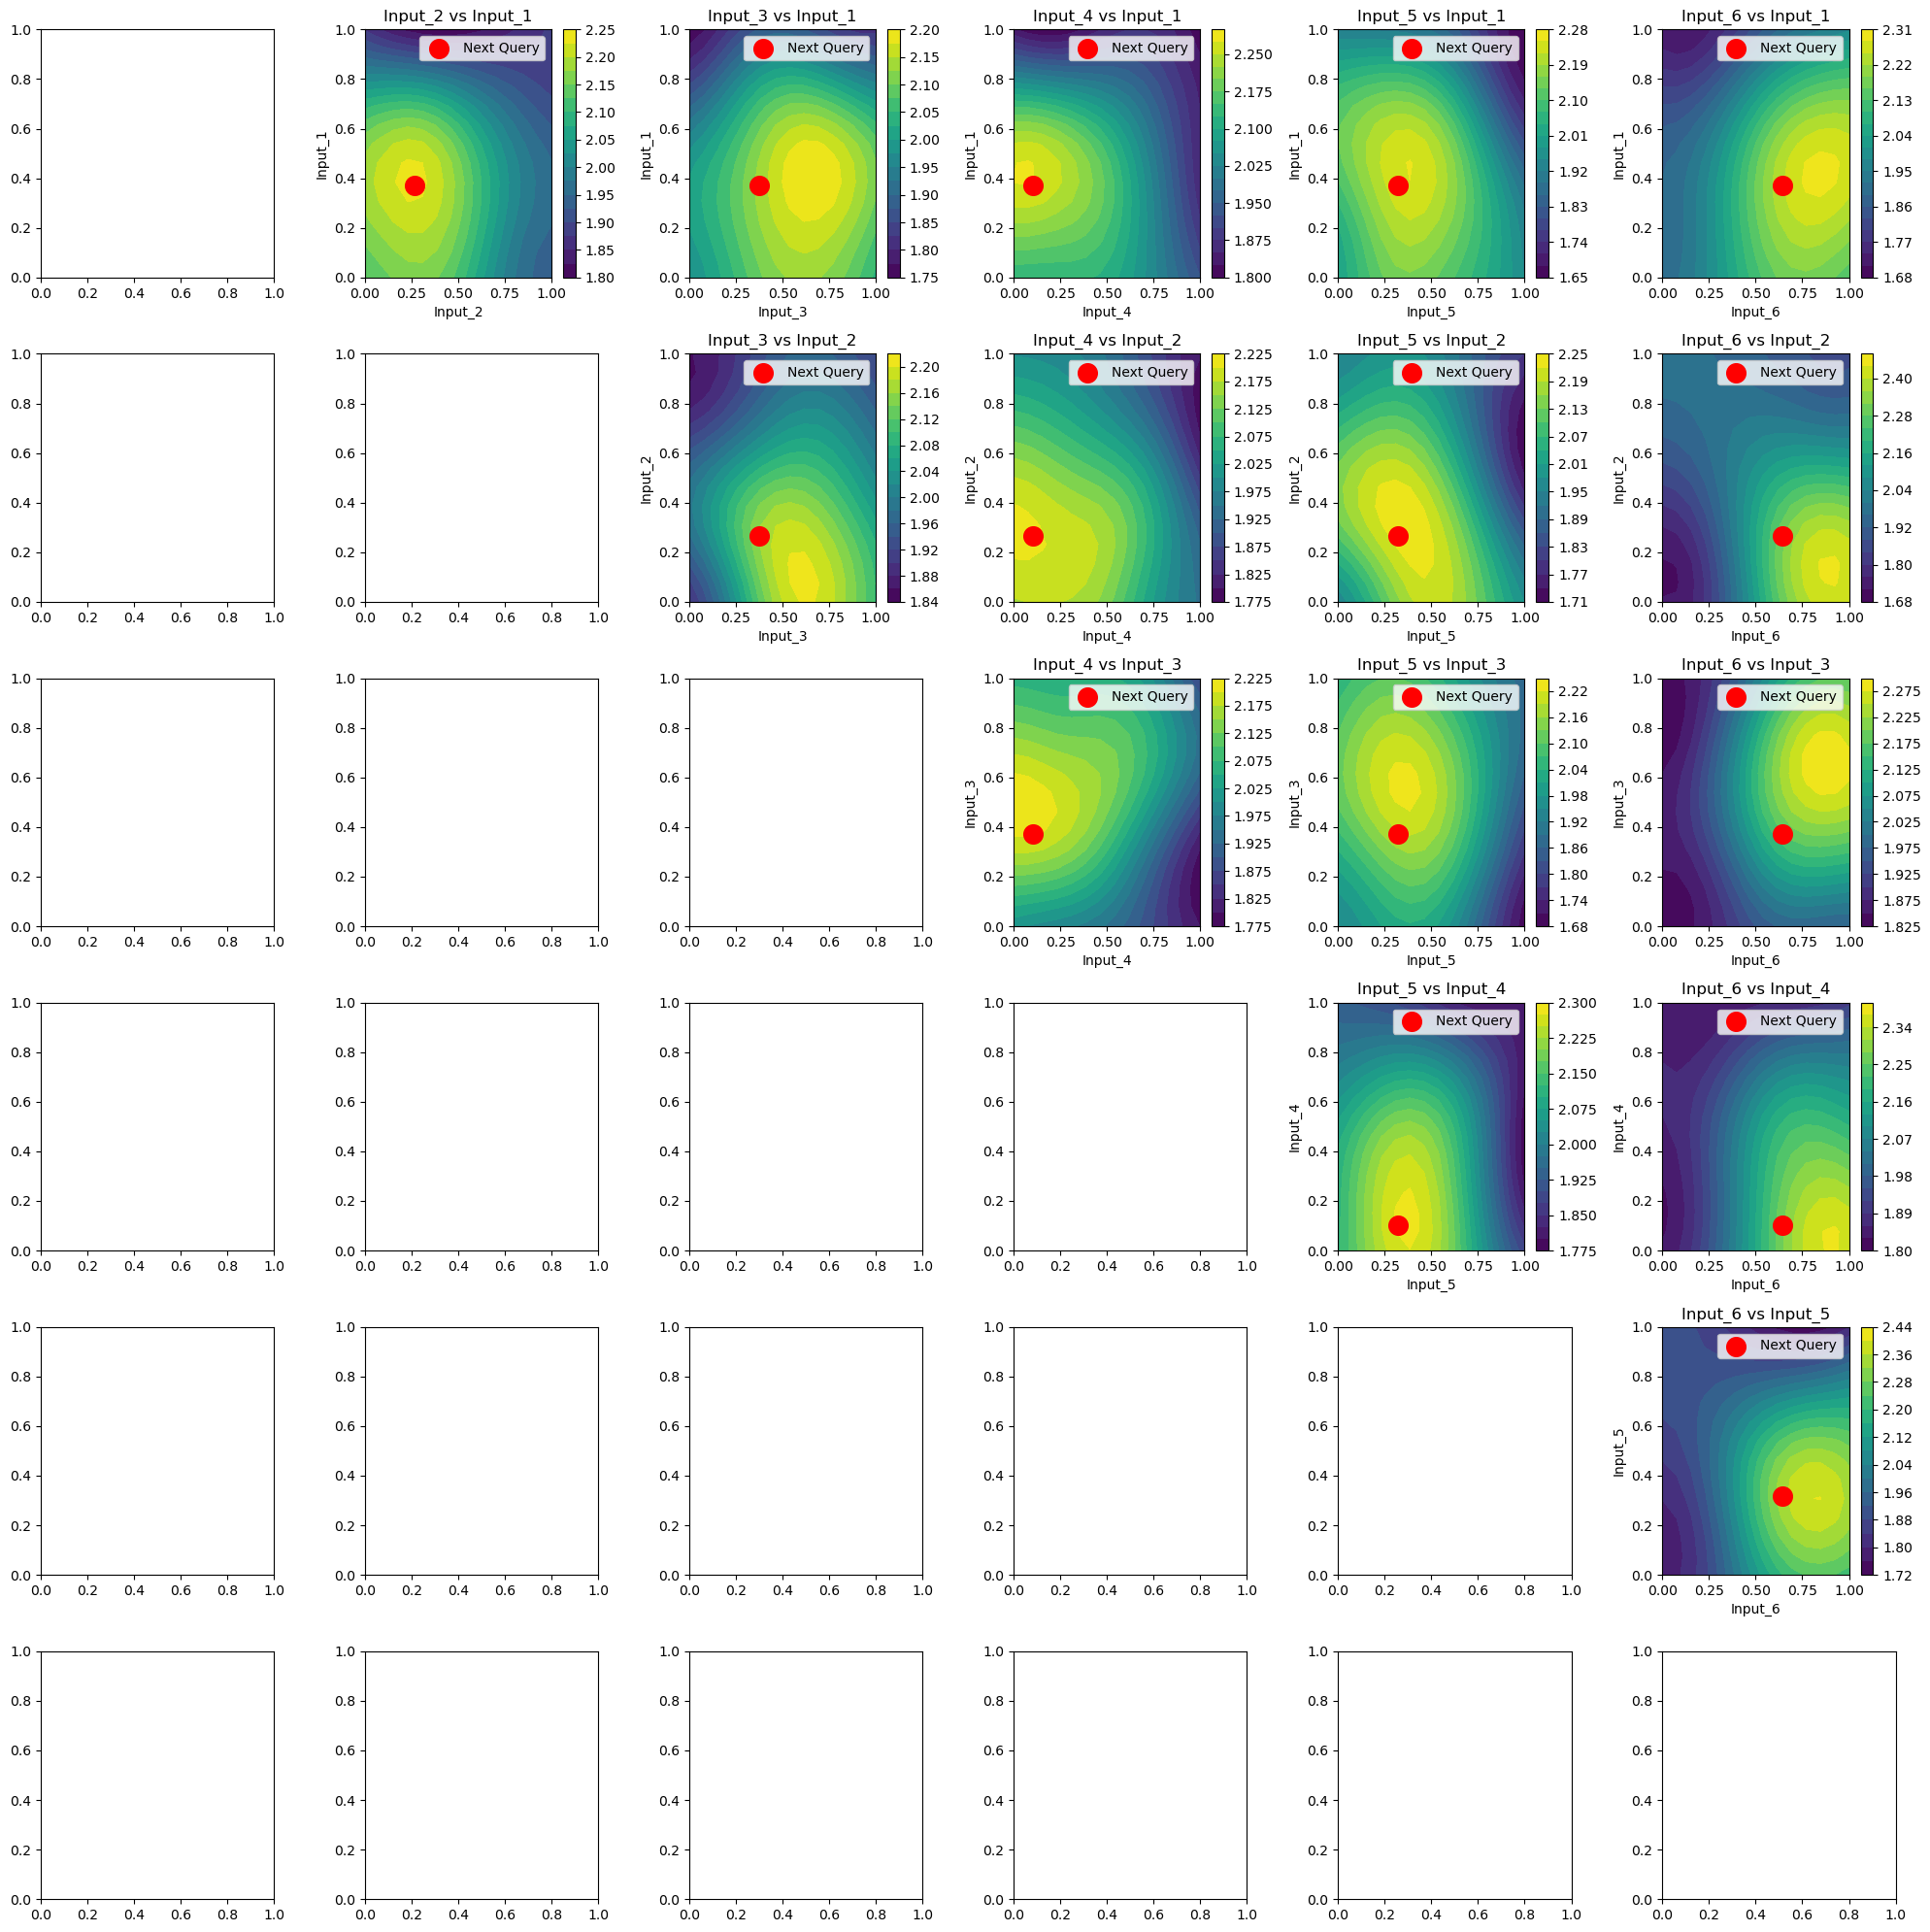

In [54]:
input_labels = X.columns.tolist()  # Correctly fetching input labels from DataFrame

# Create figure for plotting
fig, axes = plt.subplots(dim, dim, figsize=(20, 20))

for i, j in combinations(range(dim), 2):
    ax = axes[i, j] if dim > 1 else axes[max(i, j)]  # Correct indexing for subplot
    reshaped_acq_func = acquisition_function.reshape([GG]*dim)

    # Reduce all dimensions except for i and j
    axes_to_avg = tuple(k for k in range(dim) if k not in [i, j])
    reshaped_acq_func = np.mean(reshaped_acq_func, axis=axes_to_avg)
    
    # Create meshgrid for the contour plot
    x, y = np.meshgrid(np.linspace(0, 1, GG), np.linspace(0, 1, GG))
    cp = ax.contourf(x, y, reshaped_acq_func, cmap='viridis', levels=20)
    fig.colorbar(cp, ax=ax)
    
    # Plot the location of the next query: Ensure axis alignment is correct
    # Swap the indices for x and y based on their respective dimensions
    next_query_x = next_query[j]  # Using j for x-axis
    next_query_y = next_query[i]  # Using i for y-axis

    # Convert to plot scale
    next_query_x_idx = int(next_query_x * (GG - 1))
    next_query_y_idx = int(next_query_y * (GG - 1))

    # Plot the location of the next query
    ax.scatter(next_query_x, next_query_y, color='red', s=200, label='Next Query')
    ax.legend()

    ax.set_title(f'{input_labels[j]} vs {input_labels[i]}')  # Ensure correct title
    ax.set_xlabel(input_labels[j])  # x-axis should use j
    ax.set_ylabel(input_labels[i])  # y-axis should use i

plt.tight_layout()
plt.show()

In [55]:
#Acquisition function variando parametros

#######################################################
beta = 1.96
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("Beta 1.96",f"[{formatted_row}]")
#######################################################
beta = 0.00000001
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("Beta CERO",f"[{formatted_row}]")
#######################################################
beta = 2.6
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("Beta 2.6",f"[{formatted_row}]")
#######################################################
acquisition_function = std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("ONLY std",f"[{formatted_row}]")
#######################################################

Beta 1.96 [0.373077-0.265385-0.373077-0.103846-0.319231-0.642308]
Beta CERO [0.319231-0.211538-0.426923-0.265385-0.319231-0.642308]
Beta 2.6 [0.373077-0.319231-0.319231-0.050000-0.319231-0.642308]
ONLY std [0.050000-0.050000-0.750000-0.750000-0.750000-0.050000]


### 28 Apr. Ask 1. [0.250000-0.250000-0.450000-0.250000-0.350000-0.750000]

- En fase exploratoria con length scale de 0.2 y 0.3, noise entre e-4 y e-10. No cambio mucho

Mas exploratorio con length 0,3
Beta 1.96 [0.150000-0.250000-0.450000-0.250000-0.350000-0.750000]
Beta 2.6 [0.250000-0.250000-0.450000-0.250000-0.350000-0.750000]***

MAs cerca del maximo con length 0.1
Beta 1.96 [0.050000-0.450000-0.250000-0.150000-0.350000-0.750000]
Beta 2.6 [0.050000-0.550000-0.150000-0.250000-0.450000-0.750000]

Maximo actual 0.057896	0.491672	0.247422	0.218118	0.420428	0.730970	1.364968


#### 4 May
Vamos a volver a submit el primero y voy a submit uno mas.
Pr si las dudas, voy a subir el original como segundo submit.
- [0.050000-0.550000-0.150000-0.250000-0.450000-0.750000]
- [0.250000-0.250000-0.450000-0.250000-0.350000-0.750000] ***

#### May 10
El *** encontro un maximo muy bueno.
- Siguiendo con Length 0.3
- Beta 2,6 [0.250000-0.166667-0.333334-0.250000-0.250000-0.916666] +++
- ONLY std [0.000001-0.999999-0.999999-0.000001-0.999999-0.000001]
- Con lengths 0.2
- B 2.6 [0.250000-0.333334-0.333334-0.333334-0.333334-0.750000]

#### May 14
+++ esta muy cerca del maximo en *** Asi que habrá que seguir explorando esa zona
- Length .3
-   Beta 1.96 [0.166667-0.166667-0.416667-0.333334-0.416667-0.666666]
-   Beta 2.6 [0.166667-0.166667-0.500000-0.416667-0.416667-0.750000]
-   Expected Improvement[0.333334-0.250000-0.416667-0.250000-0.333334-0.666666]
- Length .2
-   Beta 1.96 [0.166667-0.333334-0.416667-0.250000-0.333334-0.833333]
-   Beta 2.6 [0.250000-0.333334-0.416667-0.166667-0.250000-0.750000]
-   Expected Improvement[0.166667-0.250000-0.416667-0.250000-0.333334-0.750000]
- ******* Vamos por [0.166667-0.166667-0.500000-0.416667-0.416667-0.750000]

#### May 17
+++ seguir explorando
- **Length .3
- Beta 1.96 [0.350000-0.350000-0.550000-0.300000-0.350000-0.800000]+
- Beta CERO [0.250000-0.250000-0.450000-0.250000-0.350000-0.700000]
- Beta 2.6 [0.350000-0.350000-0.600000-0.350000-0.300000-0.800000]*
- **LEnght .2
- Beta 1.96 [0.200000-0.250000-0.400000-0.300000-0.450000-0.800000]
- Beta CERO [0.200000-0.250000-0.400000-0.300000-0.350000-0.750000]
- Beta 2.6 [0.200000-0.200000-0.350000-0.250000-0.450000-0.750000]*
- **Lenght .1
- Beta 1.96 [0.250000-0.250000-0.400000-0.300000-0.350000-0.800000]
- Beta CERO [0.250000-0.250000-0.400000-0.300000-0.350000-0.750000]
- Beta 2.6 [0.250000-0.250000-0.400000-0.350000-0.350000-0.750000]
- **EI
- [0.200000-0.250000-0.400000-0.300000-0.350000-0.750000]
- ** LogLikelihood
- Beta 1.96 [0.300000-0.250000-0.450000-0.250000-0.350000-0.650000]
- Beta CERO [0.300000-0.250000-0.450000-0.250000-0.350000-0.700000]
- Beta 2.6 [0.300000-0.200000-0.400000-0.250000-0.350000-0.650000]+++ (New max)
- query EI: [0.700000-0.400000-0.200000-0.800000-0.800000-0.800000]
- query PI: [0.750000-0.500000-0.250000-0.300000-0.800000-0.600000]

- ******* Vamos por [0.300000-0.200000-0.400000-0.250000-0.350000-0.650000] y [0.350000-0.350000-0.550000-0.300000-0.350000-0.800000]

#### 1 jun
+++ PURO LOG LIKELIHOOD
- Beta 1.96 [0.250000-0.250000-0.450000-0.250000-0.300000-0.600000]
- Beta casi CERO [0.300000-0.250000-0.400000-0.250000-0.350000-0.650000]
- Beta 2.6 [0.250000-0.250000-0.450000-0.250000-0.300000-0.600000]
+++ AJUSTANDOI RANGO MISMO PROCESO LOG LIK
- Beta 1.96 [0.275000-0.275000-0.425000-0.237500-0.312500-0.612500]
- Beta casi CERO [0.275000-0.237500-0.425000-0.237500-0.350000-0.650000]
- Beta 2.6 [0.275000-0.275000-0.462500-0.237500-0.275000-0.612500] +

****** VAMOS POR [0.275000-0.275000-0.462500-0.237500-0.275000-0.612500] Cerca del maximo

#### 7 jun
+++ Log Like
Beta 1.96 [0.333333-0.250000-0.416667-0.166667-0.333333-0.666667]
Beta CERO [0.250000-0.250000-0.416667-0.250000-0.333333-0.666667]
Beta 2.6 [0.250000-0.250000-0.416667-0.250000-0.416667-0.583333]
query EI: [0.666667-0.500000-0.333333-0.333333-1.000000-0.750000]++
query PI: [0.583333-0.500000-0.333333-0.333333-0.916667-0.666667]
+++ Log Like en rango 0.20-0.75
Beta 1.96 [0.245833-0.245833-0.429167-0.245833-0.383333-0.612500] +
casi CERO [0.291667-0.245833-0.429167-0.245833-0.337500-0.658333]
Beta 2.6 [0.245833-0.245833-0.429167-0.200000-0.383333-0.612500]
query EI: [0.750000-0.750000-0.750000-0.200000-0.750000-0.750000]
query PI: [0.750000-0.658333-0.245833-0.245833-0.750000-0.750000]

****** VAMOS POR 
+ [0.245833-0.245833-0.429167-0.245833-0.383333-0.612500]+ y 
++ [0.666667-0.500000-0.333333-0.333333-1.000000-0.750000]

#### 12 jun

- *Con scaler, sin afinar rango
- Beta 1.96 [0.336667-0.255000-0.418333-0.173333-0.336667-0.663333]
- casi CERO [0.336667-0.255000-0.418333-0.255000-0.336667-0.663333]

- *Con scaler afinando de 0 a 0.8
- Beta 1.96 [0.307692-0.246154-0.369231-0.123077-0.307692-0.676923]
- casi CERO [0.307692-0.246154-0.430769-0.246154-0.307692-0.676923]

- Con sclaer afinando de 0.05 a 0.75
- Beta 1.96 [0.319231-0.265385-0.373077-0.157692-0.319231-0.642308]
- casi CERO [0.319231-0.211538-0.426923-0.265385-0.319231-0.696154]

- *****Vamos por Cero y 1.96 de la ultima corrida
- Beta 1.96 [0.319231-0.265385-0.373077-0.157692-0.319231-0.642308]
- casi CERO [0.319231-0.211538-0.426923-0.265385-0.319231-0.696154]



### Expected improvement

In [35]:
from scipy.stats import norm

def acquisition_ei(gpr_model, x, best_y):
    mean, std = gpr_model.predict(x, return_std=True)
    z = (mean - best_y) / (std + 1e-9)
    return std * (z * norm.cdf(z) + norm.pdf(z))

#Acquisition function
#######################################################
best_y = df['Output'].max()
acquisition_function_ei=acquisition_ei(GPR_model,  X_grid, best_y)
#######################################################

idx_max_ei = np.argmax(acquisition_function_ei) #en que index esta el maximo del acquisitonm function
next_query_ei = X_grid[idx_max_ei] #que valores tienes los inputs en este maximo estimado

# Formatting the single row
formatted_row_ei = '-'.join(format(x, ".6f") for x in next_query_ei)
print(f"[{formatted_row_ei}]")

/Users/macponcho/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GaussianProcessRegressor was fitted with feature names
  warnings.warn(


[0.336667-0.255000-0.418333-0.255000-0.336667-0.663333]


## Probando optimizacion de parametros LOG LIKELIHOOD

In [56]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
import itertools as it
from skopt import gp_minimize
from skopt.space import Real
from skopt.utils import use_named_args
from skopt.acquisition import gaussian_lcb, gaussian_ei, gaussian_pi
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress specific warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

X = df.drop(columns=['Output'])
y = df[['Output']] 

# O estandarizamos datos
scaler = StandardScaler()
y = torch.tensor(scaler.fit_transform(y)).float()

# Define the search space for Bayesian Optimization
space = [
    Real(1e-3, 1e-0, name='length_scale'),
    Real(1e-10, 1e-1, name='noise_level')
]

# Evaluation function (Log-Likelihood)
def evaluate_model(length_scale, noise_level):
    # Define kernel with given length scale
    kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=length_scale, length_scale_bounds='fixed') + WhiteKernel(noise_level=noise_level)
    GPR_model = GaussianProcessRegressor(kernel=kernel, alpha=noise_level)
    GPR_model.fit(X, y)
    log_likelihood = GPR_model.log_marginal_likelihood()
    return -log_likelihood

# Use the search space in the objective function
@use_named_args(space)
def objective(**params):
    return evaluate_model(**params)

# Perform Bayesian Optimization
res = gp_minimize(objective, space, n_calls=50, n_initial_points=10, random_state=33)

# Get the best parameters
best_length_scale = res.x[0]
best_noise_level = res.x[1]

print(f"Best length scale: {best_length_scale}")
print(f"Best noise level: {best_noise_level}")


Best length scale: 0.3000197983819887
Best noise level: 1e-10


In [57]:
# Define the best kernel
best_kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=best_length_scale, length_scale_bounds='fixed') + WhiteKernel(noise_level=best_noise_level)

# Fit the Gaussian Process with the best parameters
GPR_model_best = GaussianProcessRegressor(kernel=best_kernel, alpha=best_noise_level)
GPR_model_best.fit(X, y)

# Predictions using the surrogate model
mean, std = GPR_model_best.predict(X_grid_df, return_std=True)

# Acquisition function
beta = 1.96
acquisition_function = mean + beta * std

# Find the next query point
idx_max = np.argmax(acquisition_function)
next_query = X_grid[idx_max]

# Formatting the single row
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print(f"Next query point with Beta 1.96: [{formatted_row}]")
print("     ")


Next query point with Beta 1.96: [0.319231-0.265385-0.373077-0.157692-0.319231-0.642308]
     


In [58]:
#Acquisition function variando parametros

#######################################################
beta = 1.96
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("Beta 1.96",f"[{formatted_row}]")
#######################################################
beta = 0.00000001
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("casi CERO",f"[{formatted_row}]")
#######################################################
beta = 2.6
acquisition_function = mean + beta * std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("Beta 2.6",f"[{formatted_row}]")
#######################################################
acquisition_function = std
idx_max = np.argmax(acquisition_function) #en que index esta el maximo del acquisitonm function
next_query = X_grid[idx_max] #que valores tienes los inputs en este maximo estimado
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print("ONLY std",f"[{formatted_row}]")
#######################################################

Beta 1.96 [0.319231-0.265385-0.373077-0.157692-0.319231-0.642308]
casi CERO [0.319231-0.211538-0.426923-0.265385-0.319231-0.696154]
Beta 2.6 [0.373077-0.265385-0.373077-0.103846-0.319231-0.642308]
ONLY std [0.050000-0.050000-0.750000-0.750000-0.750000-0.050000]


In [50]:
# Acquisition function choices

acquisition_function = gaussian_ei(X_grid, model=GPR_model_best, xi=0.01)

# Find the next query point
idx_max = np.argmax(acquisition_function)
next_query = X_grid[idx_max]

# Formatting the single row
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print(f"query EI: [{formatted_row}]")

# */*******************************************************************************

acquisition_function = gaussian_pi(X_grid, model=GPR_model_best, xi=0.01)

# Find the next query point
idx_max = np.argmax(acquisition_function)
next_query = X_grid[idx_max]

# Formatting the single row
formatted_row = '-'.join(format(x, ".6f") for x in next_query)
print(f"query PI: [{formatted_row}]")

query EI: [0.676923-0.553846-0.123077-0.246154-0.800000-0.615385]
query PI: [0.123077-0.123077-0.123077-0.123077-0.123077-0.123077]
